<div style="text-align: center;">
    
### 📝 **Audio Classification using UrbanSound8K Dataset**

#### *Signals and Systems Lab - Fall 2024*

</div>

---

#### 📚 **Project Overview**

This project involves developing a system to classify various audio signals (speech, music, and noise) using signal processing techniques and neural networks. The dataset used is the **UrbanSound8K** dataset, and the project focuses on filtering, pitch detection, and audio classification.

---

#### 🗂️ **Project Steps**

1. **Research and Literature Review**
2. **Data Collection and Preprocessing**
3. **Pitch Detection Algorithm**
4. **Audio Classification with Neural Networks**
5. **Testing and Evaluation**
6. **Documentation and Presentation**

---

#### ⚙️ **Tools and Libraries**

- **Python**: `librosa`, `pandas`, `numpy`, `matplotlib`, `scipy`
- **Dataset**: [UrbanSound8K](https://www.kaggle.com/datasets/chrisfilo/urbansound8k)
- **Neural Network Framework**: TensorFlow/Keras or PyTorch

---

#### **Project Members:**
- **M. Ali Riaz**
- **Syed Adnan Aijaz**
- **Wahaj Nasir**
- **Shaheer Mukhtiar**

---


Training with autocorr pitch detection...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (autocorr): 89.70%
                  precision    recall  f1-score   support

 air_conditioner       0.95      0.94      0.94       203
        car_horn       0.95      0.71      0.81        86
children_playing       0.82      0.89      0.85       183
        dog_bark       0.88      0.89      0.88       201
        drilling       0.90      0.87      0.88       206
   engine_idling       0.95      0.97      0.96       193
        gun_shot       0.97      0.79      0.87        72
      jackhammer       0.91      0.97      0.94       208
           siren       0.88      0.96      0.92       165
    street_music       0.86      0.83      0.84       230

        accuracy                           0.90      1747
       macro avg       0.91      0.88      0.89      1747
    weighted avg       0.90      0.90      0.90      1747


Training with hps pitch detection...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (hps): 89.98%
                  precision    recall  f1-score   support

 air_conditioner       0.96      0.93      0.95       203
        car_horn       0.95      0.73      0.83        86
children_playing       0.76      0.92      0.83       183
        dog_bark       0.91      0.89      0.90       201
        drilling       0.91      0.86      0.89       206
   engine_idling       0.94      0.97      0.96       193
        gun_shot       0.97      0.78      0.86        72
      jackhammer       0.90      0.97      0.94       208
           siren       0.91      0.96      0.94       165
    street_music       0.88      0.83      0.85       230

        accuracy                           0.90      1747
       macro avg       0.91      0.88      0.89      1747
    weighted avg       0.90      0.90      0.90      1747


Training with piptrack pitch detection...

Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold7\159708-6-1-0.wav: zero-size array to reduction operation m

c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold1\46669-4-0-39.wav: zero-size array to reduction operation maximum which has no identity
Model Accuracy (piptrack): 89.52%
                  precision    recall  f1-score   support

 air_conditioner       0.94      0.96      0.95       226
        car_horn       0.87      0.66      0.75        80
children_playing       0.78      0.86      0.82       189
        dog_bark       0.92      0.87      0.90       197
        drilling       0.94      0.90      0.92       210
   engine_idling       0.94      0.97      0.95       208
        gun_shot       0.98      0.75      0.85        73
      jackhammer       0.89      0.95      0.92       190
           siren       0.90      0.97      0.93       164
    street_music       0.84      0.83      0.83       209

        accuracy                           0.90      1746
       macro avg       0.90      0.87      0.88      1746
    weighted avg       0.90      0.90      0.89      1746



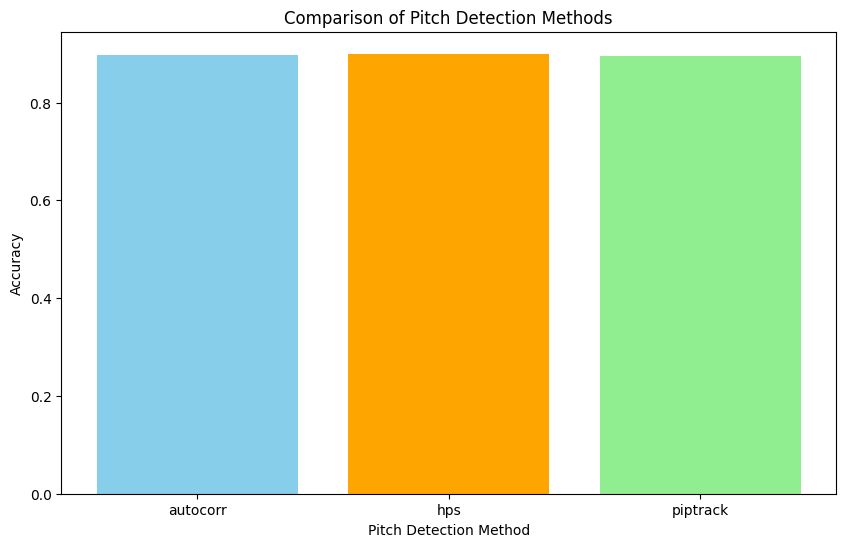


Best Pitch Detection Method: hps

Starting Audio Classification into Speech, Music, and Noise...


Audio Classification Accuracy: 82.03%
              precision    recall  f1-score   support

       music       0.81      0.50      0.61       230
       noise       0.84      0.95      0.89      1133
      speech       0.76      0.64      0.69       384

    accuracy                           0.82      1747
   macro avg       0.80      0.69      0.73      1747
weighted avg       0.82      0.82      0.81      1747



In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CSV data
csv_path = 'D:/DE-44 Projects/SNS/Ali_Riaz/UrbanSound8K.csv'
data = pd.read_csv(csv_path)

# Directory containing the fold folders
base_dir = 'D:/DE-44 Projects/SNS/Ali_Riaz/'

# Autocorrelation-based pitch detection
def detect_pitch_autocorr(y, sr):
    autocorr = librosa.autocorrelate(y)
    peak = np.argmax(autocorr[50:]) + 50  # Ignore very low frequencies
    pitch = sr / peak
    return pitch

# Harmonic Product Spectrum (HPS) pitch detection
def detect_pitch_hps(y, sr):
    spectrum = np.abs(np.fft.rfft(y))
    hps = spectrum.copy()
    for h in range(2, 6):  # Downsample and multiply harmonics
        decimated = spectrum[::h]
        hps[:len(decimated)] *= decimated
    peak = np.argmax(hps)
    pitch = sr * peak / len(y)
    return pitch

# Librosa's piptrack method
def detect_pitch_piptrack(y, sr):
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
    pitch = np.max(pitches[magnitudes > np.median(magnitudes)])
    return pitch

# Function to extract features with specified pitch detection method
def extract_features(row, pitch_method):
    fold = f"fold{row['fold']}"
    file_path = os.path.join(base_dir, fold, row['slice_file_name'])
    
    try:
        # Load the audio file
        y, sr = librosa.load(file_path, sr=None)
        
        # Feature extraction
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        zcr = np.mean(librosa.feature.zero_crossing_rate(y))
        rms = np.mean(librosa.feature.rms(y=y))
        energy = np.sum(np.square(y))
        
        # Pitch Detection
        if pitch_method == 'autocorr':
            pitch = detect_pitch_autocorr(y, sr)
        elif pitch_method == 'hps':
            pitch = detect_pitch_hps(y, sr)
        elif pitch_method == 'piptrack':
            pitch = detect_pitch_piptrack(y, sr)
        else:
            pitch = None
        
        features = {
            'mfccs': mfccs,
            'zcr': zcr,
            'rms': rms,
            'energy': energy,
            'pitch': pitch
        }
        
        return features
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to preprocess data with a given pitch detection method
def preprocess_data(pitch_method):
    preprocessed_data = []
    for index, row in data.iterrows():
        features = extract_features(row, pitch_method)
        if features:
            features.update({
                'slice_file_name': row['slice_file_name'],
                'fsID': row['fsID'],
                'start': row['start'],
                'end': row['end'],
                'salience': row['salience'],
                'fold': row['fold'],
                'classID': row['classID'],
                'class': row['class']
            })
            preprocessed_data.append(features)
    
    # Convert to DataFrame
    preprocessed_df = pd.DataFrame(preprocessed_data)
    
    # Expand MFCC columns
    mfcc_columns = [f'mfcc_{i+1}' for i in range(13)]
    mfcc_df = pd.DataFrame(preprocessed_df['mfccs'].tolist(), columns=mfcc_columns)
    preprocessed_df = pd.concat([preprocessed_df.drop('mfccs', axis=1), mfcc_df], axis=1)
    
    return preprocessed_df

# Function to train and evaluate the model
def train_and_evaluate(pitch_method):
    print(f"\nTraining with {pitch_method} pitch detection...\n")
    preprocessed_df = preprocess_data(pitch_method)
    
    # Feature and target selection
    X = preprocessed_df.drop(columns=['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold', 'classID', 'class'])
    y = preprocessed_df['class']
    
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a RandomForest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy ({pitch_method}): {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    
    return accuracy

# Compare pitch detection methods
methods = ['autocorr', 'hps', 'piptrack']
results = {}

for method in methods:
    accuracy = train_and_evaluate(method)
    results[method] = accuracy

# Plot comparison of pitch detection methods
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'orange', 'lightgreen'])
plt.title('Comparison of Pitch Detection Methods')
plt.xlabel('Pitch Detection Method')
plt.ylabel('Accuracy')
plt.show()

print("\nBest Pitch Detection Method:", max(results, key=results.get))

# ------------------------ AUDIO CLASSIFICATION ------------------------

print("\nStarting Audio Classification into Speech, Music, and Noise...\n")

# Define categories for classification
def classify_audio_category(row):
    class_mapping = {
        'speech': ['dog_bark', 'children_playing'],
        'music': ['street_music'],
        'noise': ['air_conditioner', 'car_horn', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren']
    }
    for category, labels in class_mapping.items():
        if row['class'] in labels:
            return category
    return 'unknown'

# Add a new category column to the dataset
data['category'] = data.apply(classify_audio_category, axis=1)

# Prepare data for classification
X_category = data[['fsID', 'start', 'end', 'salience', 'fold']]
y_category = data['category']

# Train-test split
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_category, y_category, test_size=0.2, random_state=42)

# Train RandomForest Classifier
clf_category = RandomForestClassifier(n_estimators=100, random_state=42)
clf_category.fit(X_train_cat, y_train_cat)

# Predictions
y_pred_cat = clf_category.predict(X_test_cat)

# Evaluate the model
accuracy_cat = accuracy_score(y_test_cat, y_pred_cat)
print(f"\nAudio Classification Accuracy: {accuracy_cat * 100:.2f}%")
print(classification_report(y_test_cat, y_pred_cat))



Training with autocorr pitch detection without noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (autocorr without noise): 89.70%
                  precision    recall  f1-score   support

 air_conditioner       0.95      0.94      0.94       203
        car_horn       0.95      0.71      0.81        86
children_playing       0.82      0.89      0.85       183
        dog_bark       0.88      0.89      0.88       201
        drilling       0.90      0.87      0.88       206
   engine_idling       0.95      0.97      0.96       193
        gun_shot       0.97      0.79      0.87        72
      jackhammer       0.91      0.97      0.94       208
           siren       0.88      0.96      0.92       165
    street_music       0.86      0.83      0.84       230

        accuracy                           0.90      1747
       macro avg       0.91      0.88      0.89      1747
    weighted avg       0.90      0.90      0.90      1747


Training with autocorr pitch detection with rayleigh noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (autocorr with rayleigh noise): 87.01%
                  precision    recall  f1-score   support

 air_conditioner       0.93      0.91      0.92       203
        car_horn       0.93      0.73      0.82        86
children_playing       0.71      0.82      0.76       183
        dog_bark       0.86      0.85      0.85       201
        drilling       0.90      0.86      0.88       206
   engine_idling       0.92      0.97      0.95       193
        gun_shot       0.95      0.79      0.86        72
      jackhammer       0.91      0.95      0.93       208
           siren       0.85      0.92      0.89       165
    street_music       0.83      0.78      0.81       230

        accuracy                           0.87      1747
       macro avg       0.88      0.86      0.87      1747
    weighted avg       0.87      0.87      0.87      1747


Training with autocorr pitch detection with nakagami noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (autocorr with nakagami noise): 86.55%
                  precision    recall  f1-score   support

 air_conditioner       0.91      0.91      0.91       203
        car_horn       0.91      0.72      0.81        86
children_playing       0.72      0.80      0.76       183
        dog_bark       0.84      0.83      0.83       201
        drilling       0.90      0.88      0.89       206
   engine_idling       0.92      0.96      0.94       193
        gun_shot       0.95      0.81      0.87        72
      jackhammer       0.90      0.95      0.92       208
           siren       0.84      0.92      0.88       165
    street_music       0.84      0.77      0.80       230

        accuracy                           0.87      1747
       macro avg       0.87      0.86      0.86      1747
    weighted avg       0.87      0.87      0.87      1747


Training with hps pitch detection without noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (hps without noise): 89.98%
                  precision    recall  f1-score   support

 air_conditioner       0.96      0.93      0.95       203
        car_horn       0.95      0.73      0.83        86
children_playing       0.76      0.92      0.83       183
        dog_bark       0.91      0.89      0.90       201
        drilling       0.91      0.86      0.89       206
   engine_idling       0.94      0.97      0.96       193
        gun_shot       0.97      0.78      0.86        72
      jackhammer       0.90      0.97      0.94       208
           siren       0.91      0.96      0.94       165
    street_music       0.88      0.83      0.85       230

        accuracy                           0.90      1747
       macro avg       0.91      0.88      0.89      1747
    weighted avg       0.90      0.90      0.90      1747


Training with hps pitch detection with rayleigh noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (hps with rayleigh noise): 86.20%
                  precision    recall  f1-score   support

 air_conditioner       0.94      0.91      0.93       203
        car_horn       0.88      0.70      0.78        86
children_playing       0.70      0.84      0.76       183
        dog_bark       0.84      0.81      0.82       201
        drilling       0.89      0.86      0.87       206
   engine_idling       0.93      0.96      0.95       193
        gun_shot       0.97      0.79      0.87        72
      jackhammer       0.91      0.94      0.92       208
           siren       0.83      0.92      0.87       165
    street_music       0.82      0.78      0.80       230

        accuracy                           0.86      1747
       macro avg       0.87      0.85      0.86      1747
    weighted avg       0.87      0.86      0.86      1747


Training with hps pitch detection with nakagami noise...



c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Model Accuracy (hps with nakagami noise): 85.98%
                  precision    recall  f1-score   support

 air_conditioner       0.91      0.90      0.91       203
        car_horn       0.94      0.72      0.82        86
children_playing       0.70      0.79      0.74       183
        dog_bark       0.84      0.81      0.82       201
        drilling       0.90      0.86      0.88       206
   engine_idling       0.91      0.97      0.94       193
        gun_shot       0.97      0.81      0.88        72
      jackhammer       0.91      0.94      0.92       208
           siren       0.84      0.92      0.88       165
    street_music       0.81      0.79      0.80       230

        accuracy                           0.86      1747
       macro avg       0.87      0.85      0.86      1747
    weighted avg       0.86      0.86      0.86      1747


Training with piptrack pitch detection without noise...

Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold7\159708-6-1-0.wav: zero-s

c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold1\46669-4-0-39.wav: zero-size array to reduction operation maximum which has no identity
Model Accuracy (piptrack without noise): 89.52%
                  precision    recall  f1-score   support

 air_conditioner       0.94      0.96      0.95       226
        car_horn       0.87      0.66      0.75        80
children_playing       0.78      0.86      0.82       189
        dog_bark       0.92      0.87      0.90       197
        drilling       0.94      0.90      0.92       210
   engine_idling       0.94      0.97      0.95       208
        gun_shot       0.98      0.75      0.85        73
      jackhammer       0.89      0.95      0.92       190
           siren       0.90      0.97      0.93       164
    street_music       0.84      0.83      0.83       209

        accuracy                           0.90      1746
       macro avg       0.90      0.87      0.88      1746
    weighted avg       0.90      0.90      0.89      17

c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold10\188497-2-0-0.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold10\188497-2-0-1.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold10\188497-2-0-8.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold6\34952-8-0-3.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold6\34952-8-0-6.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold4\35629-3-3-0.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold4\39968-9-0-69.wav: zero-size array to reduction operation maximum which has no identity
Error process

c:\Users\Azlaan\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold1\46669-4-0-39.wav: zero-size array to reduction operation maximum which has no identity
Error processing D:/DE-44 Projects/SNS/Ali_Riaz/fold6\52882-2-0-4.wav: zero-size array to reduction operation maximum which has no identity
Model Accuracy (piptrack with nakagami noise): 85.90%
                  precision    recall  f1-score   support

 air_conditioner       0.90      0.95      0.92       202
        car_horn       0.91      0.77      0.83        81
children_playing       0.70      0.78      0.74       190
        dog_bark       0.84      0.79      0.81       199
        drilling       0.92      0.87      0.90       207
   engine_idling       0.93      0.92      0.93       201
        gun_shot       0.95      0.82      0.88        74
      jackhammer       0.88      0.93      0.90       194
           siren       0.86      0.88      0.87       178
    street_music       0.80      0.81      0.80       219

        accuracy         

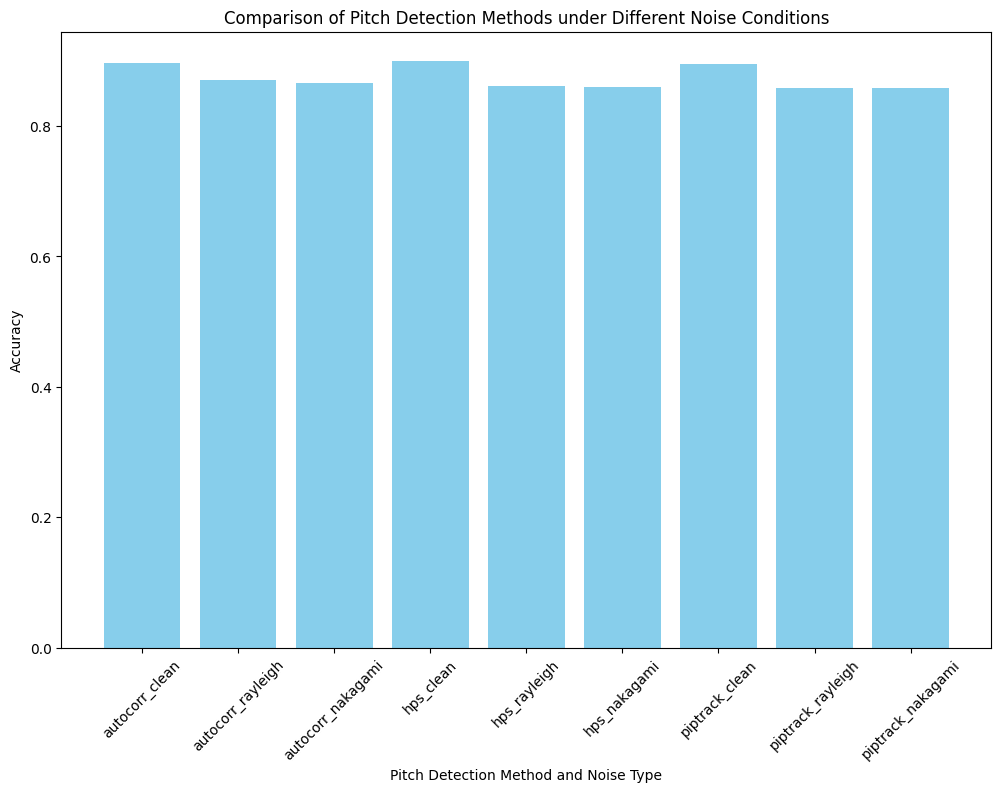


Best Configuration: hps_clean


In [2]:
# ------------------------ NOISE ADDITION AND EVALUATION ------------------------

# Function to add Rayleigh noise
def add_rayleigh_noise(y, scale=0.01):
    noise = np.random.rayleigh(scale, size=len(y))
    return y + noise

# Function to add Nakagami-m noise
def add_nakagami_noise(y, shape=1.0, scale=0.01):
    noise = np.random.gamma(shape, scale, size=len(y))
    return y + noise

# Function to preprocess data with noise and pitch detection method
def preprocess_data_with_noise(pitch_method, noise_type=None):
    preprocessed_data = []
    for index, row in data.iterrows():
        fold = f"fold{row['fold']}"
        file_path = os.path.join(base_dir, fold, row['slice_file_name'])
        
        try:
            # Load the audio file
            y, sr = librosa.load(file_path, sr=None)
            
            # Add noise if specified
            if noise_type == 'rayleigh':
                y = add_rayleigh_noise(y)
            elif noise_type == 'nakagami':
                y = add_nakagami_noise(y)
            
            # Feature extraction
            mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            zcr = np.mean(librosa.feature.zero_crossing_rate(y))
            rms = np.mean(librosa.feature.rms(y=y))
            energy = np.sum(np.square(y))
            
            # Pitch Detection
            if pitch_method == 'autocorr':
                pitch = detect_pitch_autocorr(y, sr)
            elif pitch_method == 'hps':
                pitch = detect_pitch_hps(y, sr)
            elif pitch_method == 'piptrack':
                pitch = detect_pitch_piptrack(y, sr)
            else:
                pitch = None
            
            features = {
                'mfccs': mfccs,
                'zcr': zcr,
                'rms': rms,
                'energy': energy,
                'pitch': pitch,
                'class': row['class']
            }
            
            preprocessed_data.append(features)
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Convert to DataFrame
    preprocessed_df = pd.DataFrame(preprocessed_data)
    
    # Expand MFCC columns
    mfcc_columns = [f'mfcc_{i+1}' for i in range(13)]
    mfcc_df = pd.DataFrame(preprocessed_df['mfccs'].tolist(), columns=mfcc_columns)
    preprocessed_df = pd.concat([preprocessed_df.drop('mfccs', axis=1), mfcc_df], axis=1)
    
    return preprocessed_df

# Function to train and evaluate the model with noise
def train_and_evaluate_with_noise(pitch_method, noise_type=None):
    noise_label = f" with {noise_type} noise" if noise_type else " without noise"
    print(f"\nTraining with {pitch_method} pitch detection{noise_label}...\n")
    preprocessed_df = preprocess_data_with_noise(pitch_method, noise_type)
    
    # Feature and target selection
    X = preprocessed_df.drop(columns=['class'])
    y = preprocessed_df['class']
    
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train RandomForest Classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy ({pitch_method}{noise_label}): {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    
    return accuracy

# Compare pitch detection methods under different noise conditions
methods = ['autocorr', 'hps', 'piptrack']
noise_conditions = [None, 'rayleigh', 'nakagami']
results = {}

for method in methods:
    for noise in noise_conditions:
        accuracy = train_and_evaluate_with_noise(method, noise)
        results[f"{method}_{noise or 'clean'}"] = accuracy

# Plot comparison of pitch detection methods under different noise conditions
plt.figure(figsize=(12, 8))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Comparison of Pitch Detection Methods under Different Noise Conditions')
plt.xlabel('Pitch Detection Method and Noise Type')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

print("\nBest Configuration:", max(results, key=results.get))
